# Project: Investigate TMDb Movies Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 6.3 MB/s eta 0:00:00m eta 0:00:010:00:01


In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [3]:
# Read the pandas data frame from the csv file provided

data_frame = pd.read_csv('tmdb-movies (1).csv')

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Some of the insights that we get that we have 21 columns of data some containing missing values, and we also get the data type of each column entries.
Here, we can then decide if we want to keep all the columns for our analysis before we decide what to do with the missing values. Will drop the following columns
<ul>
    <li> Homepage
    <li> Tagline
    <li> Keywords
    <li> Overview
    <li> imbd_id and id
</ul>

These are not going to be used in the analysis of data

In [26]:
# View the top 5 items on the dataframe, so that we know the kind of data we have

data_frame.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning Starts here


In [5]:
movies = data_frame.drop(['id','imdb_id','homepage','tagline','keywords','overview'], axis = 1)

In [27]:
# Convert the release date from Object type to time 

movies['release_date'] = pd.to_datetime(movies['release_date'])

# Check if the object type was changed
type(movies['release_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10866 non-null  int64         
 7   genres                10843 non-null  object        
 8   production_companies  9836 non-null   object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
 13  budget_adj      

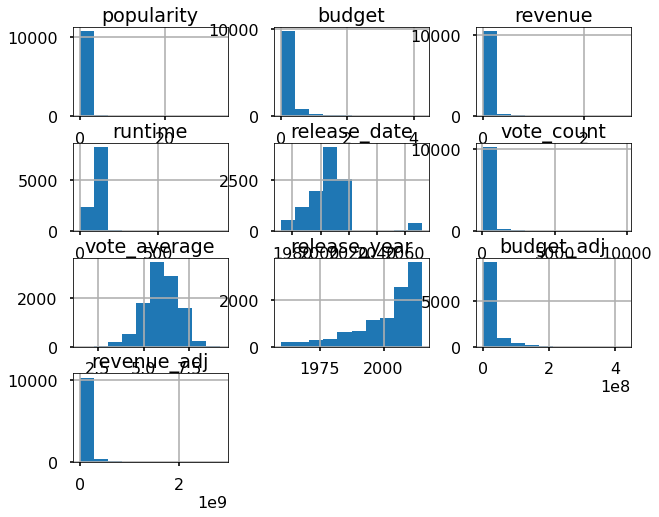

In [28]:
movies.info()
movies.hist(figsize=(10,8));

# Is there any relationship between  the movie release year and popularity?

In [29]:
years = movies.groupby('release_year')['popularity'].mean().reset_index()
px.scatter(years,x='release_year', y='popularity').show()

> From the plot above, we can see that the popularity of movies increased from around 1960 to 2015. There may be need to do causal analysis of the underlying reasons of this increase. But movies seem to be much more popular these days, probably because of the increased access of watching movies in 2015 compared to 1960s

# Which movie has the highest revenue?

In [9]:
# Check most successful movies from the revenues

Most_Successful = movies[movies["revenue_adj"]==movies["revenue_adj"].max()]
print(Most_Successful)

      popularity     budget     revenue original_title  \
1386    9.432768  237000000  2781505847         Avatar   

                                                   cast       director  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...  James Cameron   

      runtime                                    genres  \
1386      162  Action|Adventure|Fantasy|Science Fiction   

                                   production_companies release_date  \
1386  Ingenious Film Partners|Twentieth Century Fox ...   2009-12-10   

      vote_count  vote_average  release_year    budget_adj   revenue_adj  
1386        8458           7.1          2009  2.408869e+08  2.827124e+09  


> The most successful movie in the IMDB database is Avatar and it made a revenue of 2 781 505 847, produced in 2009

# Who is the most popular director?

In [31]:
# Check the most popular director

Fav_Director = movies[["original_title","director","vote_average"]][movies["vote_average"]==movies["vote_average"].max()]
Fav_Director.head()

,original_title,director,vote_average
3894,The Story of Film: An Odyssey,Mark Cousins,9.2


The most popular director is Mark Cousions whose movie The Story of Film: An Odyssey has a voting average of 9.2

In [11]:
# Check top directors

Directors = movies.groupby("director")["popularity"].mean().reset_index()
Directors.sort_values("popularity", ascending=False).head()

,director,popularity
899,Colin Trevorrow,16.696886
2333,Joe Russo|Anthony Russo,12.971027
707,Chad Stahelski|David Leitch,11.422751
1299,Don Hall|Chris Williams,8.691294
2658,Juno John Lee,8.411577


# Is there any corelation between vote_average and popularity

In [12]:
movies['vote_average'].corr(movies['popularity'])

0.20951130747540367

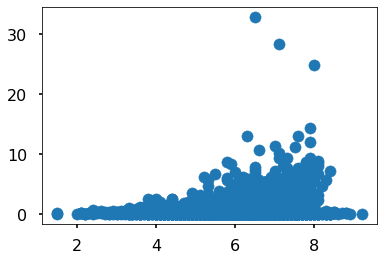

In [13]:
plt.scatter(movies.vote_average, movies.popularity)
plt.show()

There is a correlation value of 0.2 which is a weak positive corelation and from the scatter plot above it is clear that the higher the vote_average the greater the popularity of the movie.

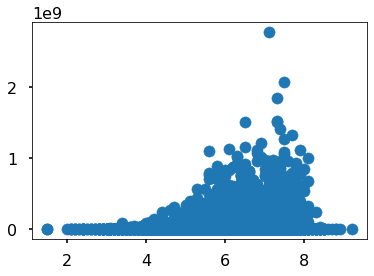

In [14]:
plt.scatter(movies.vote_average, movies.revenue)
plt.show()

/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



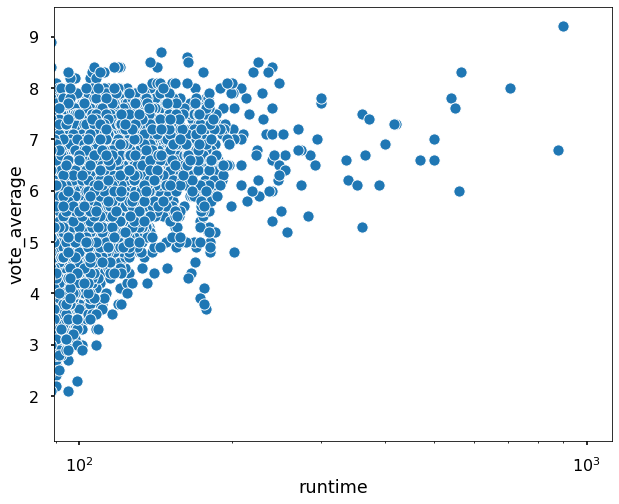

In [101]:
f, ax = plt.subplots(figsize=(10, 8))
ax.set(xscale="log")
sns.scatterplot(movies.runtime, movies.vote_average, ax=ax)
plt.show()

In [18]:
movies.genres.value_counts(normalize=True)*100

Comedy                                       6.566448
Drama                                        6.566448
Documentary                                  2.877432
Drama|Romance                                2.665314
Comedy|Drama                                 2.582311
                                               ...   
Adventure|Drama|History|War                  0.009223
Animation|Family|Fantasy|Adventure|Comedy    0.009223
Comedy|Adventure|Family                      0.009223
Thriller|Science Fiction|Foreign             0.009223
Mystery|Drama|Adventure                      0.009223
Name: genres, Length: 2039, dtype: float64

In [19]:
movies.genres.unique

<bound method Series.unique of 0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10866, dtype: object>

In [115]:
# Here we count unique genre names, we know that some genres are an ensamble of genres
# split the genres and convert the list to a set to only remain with unique values

Genres = set([str(i).split('|',1)[0] for i in movies.genres])
print('we have {} unique genres'.format(len(Genres)))

we have 21 unique genres


# What are the most popular movie genres?


In [23]:
movies_genres=movies['genres'].str.get_dummies(sep='|')
movies_genres1=movies_genres.sum().reset_index()

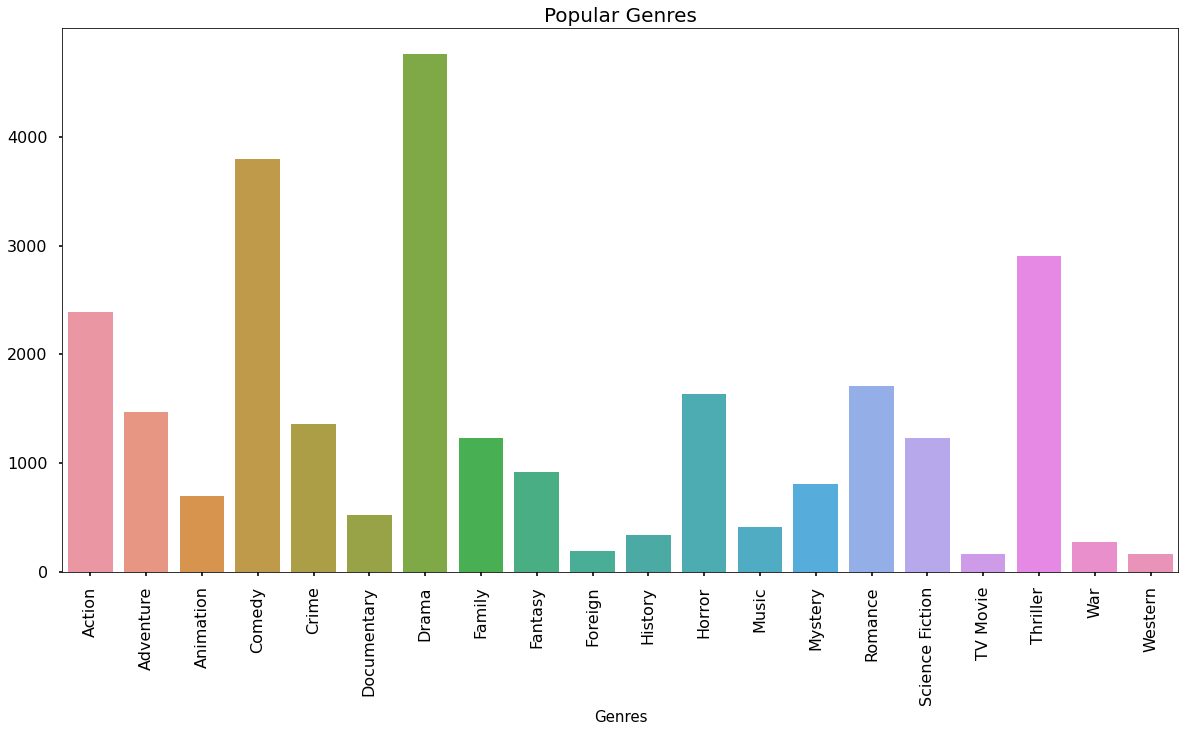

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x=movies_genres.columns,y=movies_genres.sum(),data=movies_genres1)
plt.title('Popular Genres',fontsize = 20)
plt.xlabel('Genres',fontsize = 15)
plt.ylabel('')
plt.xticks(rotation = 90)
plt.show()

The most popular movie genres are drama, comedy, thiller and action.

# Conclusions

From the analysis above we found out that the most popular genres are drama,comedy , thriller and action.Also we found that the popularity of movies increased from around 1960 to 2015. There may be need to do causal analysis of the underlying reasons of this increase. But movies seem to be much more popular these days, probably because of the increased access of watching movies in 2015 compared to 1960s. There is a weak positive corelation between vote_average and popularity.